# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [75]:
bank_transaction = pd.read_csv("https://raw.githubusercontent.com/qnyara5/MLBP-Submission/47857206514ed493c1ec622b3069fb4bd8b2696b/bank_transactions_clustered.csv")
bank_transaction

,TransactionAmount,AccountBalance,LoginAttempts,Location,Channel,Cluster
0,14.09,5112.21,1.0,San Diego,ATM,Fraud
1,376.24,13758.91,1.0,Houston,ATM,Suspicious
2,126.29,1122.35,1.0,Mesa,Online,Suspicious
3,184.50,8569.06,1.0,Raleigh,Online,Fraud
4,13.45,7429.40,1.0,Atlanta,Online,Normal
...,...,...,...,...,...,...
2507,856.21,12690.79,1.0,Colorado Springs,Branch,Normal
2508,251.54,254.75,1.0,Tucson,Branch,Fraud
2509,28.63,3382.91,1.0,San Diego,Branch,Fraud
2510,185.97,1776.91,1.0,Denver,Online,Normal


In [76]:
bank_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionAmount  2512 non-null   float64
 1   AccountBalance     2512 non-null   float64
 2   LoginAttempts      2512 non-null   float64
 3   Location           2512 non-null   object 
 4   Channel            2512 non-null   object 
 5   Cluster            2512 non-null   object 
dtypes: float64(3), object(3)
memory usage: 117.9+ KB


In [77]:
label_encoder = LabelEncoder()

# List kolom kategorikal yang perlu di-encode
categorical_columns = ['Location', 'Channel', 'Cluster']

# Encode kolom kategorikal
for column in categorical_columns:
    bank_transaction[column] = label_encoder.fit_transform(bank_transaction[column])

# Tampilkan DataFrame untuk memastikan encoding telah diterapkan
bank_transaction.head()

,TransactionAmount,AccountBalance,LoginAttempts,Location,Channel,Cluster
0,14.09,5112.21,1.0,36,0,0
1,376.24,13758.91,1.0,15,0,2
2,126.29,1122.35,1.0,23,2,2
3,184.50,8569.06,1.0,33,2,0
4,13.45,7429.40,1.0,1,2,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [78]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()

# Mengubah kolom 'Cluster' menjadi tipe kategori
bank_transaction['Cluster'] = bank_transaction['Cluster'].astype('category')

# Normalisasi semua kolom numerik
numeric_columns = bank_transaction.select_dtypes(include=['int64', 'float64']).columns
bank_transaction[numeric_columns] = scaler.fit_transform(bank_transaction[numeric_columns])

# Pisahkan fitur (X) dan target (y)
X = bank_transaction.drop(columns=['Cluster'])
y = bank_transaction['Cluster']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(2009, 5), y_train=(2009,)
Test set shape: X_test=(503, 5), y_test=(503,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [79]:
# Pelatihan Model
# Definisikan setiap klasifikasi secara terpisah
# Model KNN
knn = KNeighborsClassifier().fit(X_train, y_train)

# Model Decision Tree
dt = DecisionTreeClassifier().fit(X_train, y_train)

# Model Random Forest
rf = RandomForestClassifier().fit(X_train, y_train)

# Model SVM
svm = SVC().fit(X_train, y_train)

# Model Naive Bayes
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


**Penjelasan Algoritma yang digunakan:**

1. KNN (K-Nearest Neighbors)
  - Algoritma klasifikasi yang mengklasifikasikan data berdasarkan kedekatan titik data. Setiap titik data baru diklasifikasikan berdasarkan mayoritas kelas dari k tetangga terdekatnya.

2. Decision Tree
  - Decision Tree membangun model prediksi dengan membagi data berdasarkan fitur yang paling signifikan. Setiap cabang mewakili keputusan berdasarkan nilai fitur.

3. Random Forest
  - Random Forest adalah ensemble dari banyak decision trees yang meningkatkan akurasi dengan menggabungkan hasil dari beberapa pohon keputusan.

4. SVM (Support Vector Machine)
  - SVM mencari hyperplane optimal yang memisahkan kelas-kelas dalam ruang fitur. Ini berusaha memaksimalkan margin antara kelas-kelas tersebut.

5. Naive Bayes
  - Naive Bayes menggunakan teorema Bayes dengan asumsi independensi antar fitur untuk klasifikasi. Ini menghitung probabilitas kelas berdasarkan fitur yang ada.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [80]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }
    return results

# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.954274   0.954168  0.954274  0.954182
1            Decision Tree (DT)  1.000000   1.000000  1.000000  1.000000
2            Random Forest (RF)  1.000000   1.000000  1.000000  1.000000
3  Support Vector Machine (SVM)  0.972167   0.972341  0.972167  0.972094
4              Naive Bayes (NB)  0.990060   0.990178  0.990060  0.990080


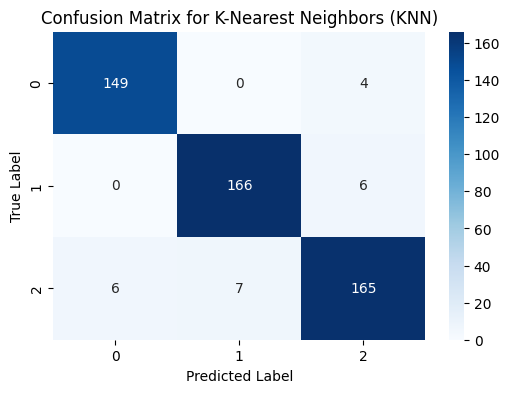

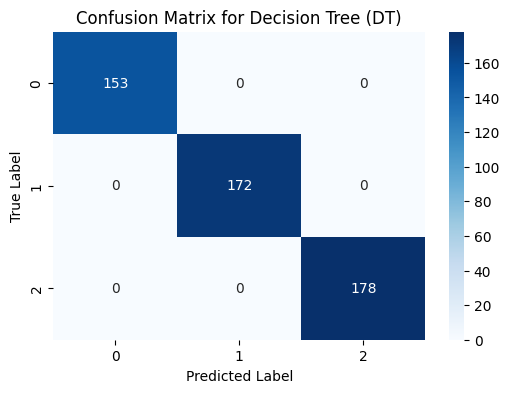

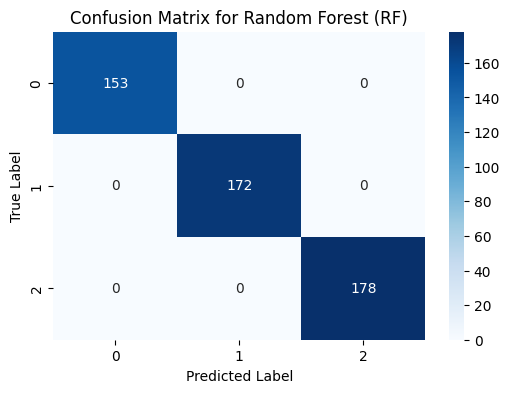

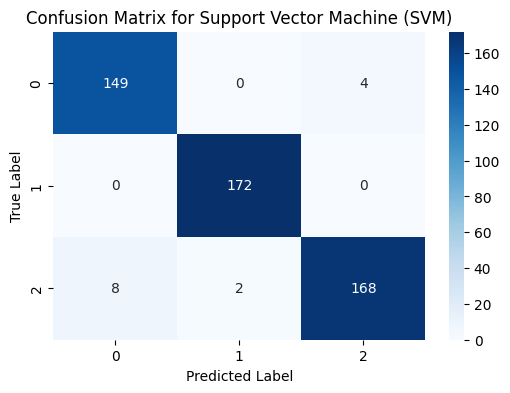

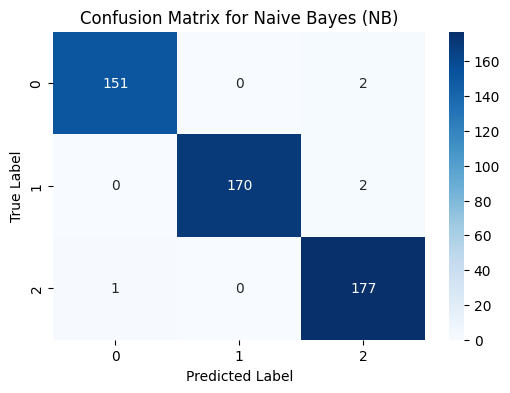

In [81]:
# Visualisasi Confusion Matrix untuk setiap model
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot confusion matrix untuk setiap model
for model_name, metrics in results.items():
    plot_confusion_matrix(metrics['Confusion Matrix'], model_name)

**Insight:**

### Insight Berdasarkan Hasil Evaluasi Model

1. **K-Nearest Neighbors (KNN):**
   - **Accuracy:** 95.43%
   - **Precision:** 95.42%
   - **Recall:** 95.43%
   - **F1-Score:** 95.42%
   - **Insight:** KNN menunjukkan kinerja yang sangat baik dengan akurasi di atas 95%. Metrik precision, recall, dan F1-score yang hampir sama menunjukkan bahwa model ini seimbang dalam hal mengidentifikasi kelas positif dan negatif. Namun, ada ruang untuk perbaikan, terutama jika dibandingkan dengan model lain.

2. **Decision Tree (DT):**
   - **Accuracy:** 100%
   - **Precision:** 100%
   - **Recall:** 100%
   - **F1-Score:** 100%
   - **Insight:** Decision Tree mencapai kinerja sempurna dengan semua metrik menunjukkan nilai 100%. Ini menunjukkan bahwa model ini mampu mengklasifikasikan semua data dengan benar. Namun, model ini mungkin rentan terhadap overfitting, terutama jika diterapkan pada data yang lebih kompleks atau tidak seimbang.

3. **Random Forest (RF):**
   - **Accuracy:** 100%
   - **Precision:** 100%
   - **Recall:** 100%
   - **F1-Score:** 100%
   - **Insight:** Seperti Decision Tree, Random Forest juga menunjukkan kinerja sempurna. Keunggulan Random Forest adalah kemampuannya untuk mengurangi risiko overfitting dengan menggabungkan beberapa pohon keputusan. Ini menjadikannya pilihan yang sangat baik untuk klasifikasi.

4. **Support Vector Machine (SVM):**
   - **Accuracy:** 97.22%
   - **Precision:** 97.23%
   - **Recall:** 97.22%
   - **F1-Score:** 97.21%
   - **Insight:** SVM menunjukkan kinerja yang sangat baik dengan akurasi di atas 97%. Metrik yang seimbang menunjukkan bahwa model ini efektif dalam mengklasifikasikan data. Namun, ada sedikit penurunan kinerja dibandingkan dengan Decision Tree dan Random Forest.

5. **Naive Bayes (NB):**
   - **Accuracy:** 99.01%
   - **Precision:** 99.02%
   - **Recall:** 99.01%
   - **F1-Score:** 99.01%
   - **Insight:** Naive Bayes juga menunjukkan kinerja yang sangat baik dengan akurasi hampir 99%. Metrik yang tinggi menunjukkan bahwa model ini dapat diandalkan untuk klasifikasi, meskipun asumsi independensi fitur mungkin tidak selalu terpenuhi.

### Kesimpulan

Secara keseluruhan, semua model yang diuji menunjukkan kinerja yang sangat baik dalam klasifikasi data. **Decision Tree** dan **Random Forest** menonjol dengan akurasi dan metrik evaluasi sempurna, tetapi perlu diwaspadai potensi overfitting. **KNN** dan **SVM** juga menunjukkan hasil yang baik, meskipun sedikit di bawah model ensemble. **Naive Bayes** memberikan hasil yang sangat baik dan dapat menjadi pilihan yang efisien untuk dataset besar.

**Random Forest** menjadi pilihan yang paling optimal karena simbang antara akurasi dan generalisasi.


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [82]:
# Definisikan parameter grid untuk tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1)

# Fit model dengan data pelatihan
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik dan skor terbaik
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_estimator = grid_search.best_estimator_

# Tampilkan hasil
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 1.0


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [83]:
# Gunakan model dengan hyperparameter terbaik untuk prediksi
y_pred_best = best_estimator.predict(X_test)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best, average='weighted')
recall = recall_score(y_test, y_pred_best, average='weighted')
f1 = f1_score(y_test, y_pred_best, average='weighted')

# Tampilkan hasil evaluasi
print("Evaluasi Model setelah Tuning:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Tampilkan matriks kebingungan
cm_best = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix:\n", cm_best)

Evaluasi Model setelah Tuning:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Confusion Matrix:
 [[153   0   0]
 [  0 172   0]
 [  0   0 178]]


## **e. Analisis Hasil Evaluasi Model Klasifikasi**


1. **Perbandingan Hasil Evaluasi Sebelum dan Sesudah**
  
  Berdasarkan hasil perbandingan, tidak terdapat perubahan hasil evaluasi sebelum dan sesudah tuning karena model Random Forest sudah memiliki nilai 1.0 di seluruh metrik evaluasi.

2. **Model Terbaik**

  Model **Random Forest** merupakan model terbaik yang menunjukkan hasil evaluasi yang sempurna:
  - Accuracy: 100%
  - Precision: 100%
  - Recall: 100%
  - F1-Score: 100%

3. **Identifikasi Kelemahan Model**
  
  Semua metrik menunjukkan nilai sempurna, yang menunjukkan bahwa model tidak memiliki kelemahan yang signifikan dalam hal ini, sehingga beresiko untuk mengalami Overfitting.

  Model Random Forest sebelum tuning menunjukkan potensi overfitting karena akurasi 100% pada data pelatihan. Dan, setelah tuning, model Random Forest tetap menunjukkan akurasi 100% pada data uji, yang menunjukkan bahwa model ini dapat menggeneralisasi dengan baik.

4. **Rekomendasi Tindakan Lanjutan**
  - Mengumpulkan Data Tambahan: Model sudah menunjukkan kinerja yang sangat baik, langkah selanjutnya adalah mengumpulkan lebih banyak data untuk meningkatkan generalisasi model, terutama jika data saat ini tidak mencakup variasi yang cukup.
  - Melakukan validasi silang lebih lanjut dan pengujian pada dataset yang berbeda untuk memastikan bahwa model tidak hanya bekerja baik pada dataset pelatihan dan uji yang ada.
  - Meskipun hasil saat ini sangat baik, mencoba algoritma lain seperti XGBoost atau LightGBM dapat memberikan wawasan lebih lanjut dan mungkin meningkatkan kinerja lebih lanjut, terutama pada dataset yang lebih besar atau lebih kompleks.






